In [1]:
import psi4
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mol_tmpl = """H
F 1 **R**"""
rvals = [0.8, 0.85, 0.9, 0.95, 1.0]

In [4]:
molecules =[]
energies = []
for r in rvals:
    molecule = psi4.geometry(mol_tmpl.replace("**R**", str(r)))
    molecules.append(molecule)
for mol in molecules:
    energy = psi4.energy("SCF/cc-pVDZ", molecule=mol)
    energies.append(energy)
print(rvals)
print(energies)

[0.8, 0.85, 0.9, 0.95, 1.0]
[-100.00264748473292, -100.0158498498068, -100.01969338232173, -100.0170231094692, -100.00985995181797]


In [5]:
data = psi4.diatomic.anharmonicity(rvals, energies)

In [6]:
print(data)

{'re': 0.9014127115106682, 'r0': 0.9099199770006021, 'we': 4440.843496024022, 'wexe': 95.7894648733589, 'nu': 4249.264566277304, 'ZPVE(harmonic)': 2196.4743817936715, 'ZPVE(anharmonic)': 2196.4743817936715, 'Be': 21.67764589063722, 'B0': 21.274191980518275, 'ae': 0.8069078202378885, 'De': 0.0020661669402905576}


In [7]:
mol_N = """N
N 1 **d**"""
rvals = np.linspace(0.7, 4, num=50)

In [8]:
molecules =[]
energies = []
for r in rvals:
    molecule = psi4.geometry(mol_N.replace("**d**", str(r)))
    molecules.append(molecule)
for mol in molecules:
    energy = psi4.energy("SCF/cc-pVDZ", molecule=mol)
    energies.append(energy)
#print(rvals)
print(energies)

[-107.61328499557617, -108.20671302725181, -108.57267687586783, -108.787368565912, -108.90136302742354, -108.94877519190139, -108.9528181765125, -108.92928220136366, -108.88885084341119, -108.8387108185511, -108.78366675277606, -108.7268921283916, -108.67043027682888, -108.61553976379732, -108.56294543496186, -108.51302431075447, -108.46593778019886, -108.42171824638447, -108.38032101754283, -108.34165372308462, -108.3055936666997, -108.27199960609857, -108.24072076544708, -108.21160377725151, -108.18449763667321, -108.15925687295945, -108.13574335554237, -108.1138272023683, -108.09338716330625, -108.07431071050529, -108.0564939524554, -108.03984142230166, -108.02426576411666, -108.00968733414118, -107.9960337324694, -107.98323927848882, -107.97124444080326, -107.95999523232967, -107.94944258381634, -107.9395417151696, -107.93025152676434, -107.92153403575566, -107.91335387615102, -107.90567787885402, -107.89847473519632, -107.89171474188933, -107.88536961814641, -107.87941238224175, -

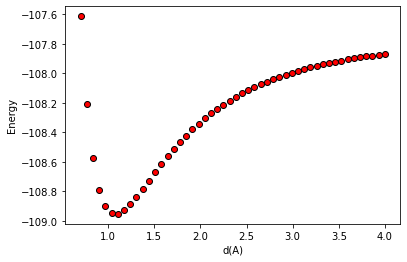

In [9]:
fig, ax = plt.subplots()
ax.scatter(rvals, energies, color='red', edgecolors=(0, 0, 0))
ax.set_xlabel('d(A)')
ax.set_ylabel('Energy')
plt.show()

In [10]:
for num, r in enumerate(rvals):
    print(r, ':', energies[num])

0.7 : -107.61328499557617
0.7673469387755102 : -108.20671302725181
0.8346938775510204 : -108.57267687586783
0.9020408163265305 : -108.787368565912
0.9693877551020408 : -108.90136302742354
1.036734693877551 : -108.94877519190139
1.1040816326530611 : -108.9528181765125
1.1714285714285713 : -108.92928220136366
1.2387755102040816 : -108.88885084341119
1.306122448979592 : -108.8387108185511
1.373469387755102 : -108.78366675277606
1.4408163265306122 : -108.7268921283916
1.5081632653061225 : -108.67043027682888
1.5755102040816327 : -108.61553976379732
1.6428571428571428 : -108.56294543496186
1.7102040816326531 : -108.51302431075447
1.7775510204081633 : -108.46593778019886
1.8448979591836734 : -108.42171824638447
1.9122448979591837 : -108.38032101754283
1.9795918367346939 : -108.34165372308462
2.0469387755102044 : -108.3055936666997
2.1142857142857143 : -108.27199960609857
2.1816326530612242 : -108.24072076544708
2.2489795918367346 : -108.21160377725151
2.316326530612245 : -108.18449763667321


In [11]:
import psi4

import numpy as np
import os
import matplotlib.pyplot as plt

In [12]:
he_geo = psi4.geometry("""
0 1
He 0.0 0.0 0.0
""")

#Request the HF calculation using the correlation consistent basis set cc-pvdz. 
e = psi4.energy("HF/cc-pvdz", molecule=he_geo)


#Print the energy. The units are given in atomic units or hartrees. 
print(f"The HF energy of He is {e}")


The HF energy of He is -2.8551883987268125


In [20]:
# ==> Set Basic Psi4 Options <==
# Memory specification
psi4.set_memory('500 MB')
numpy_memory = 2 # No NumPy array can exceed 2 MB in size

# set output file
psi4.core.set_output_file('out_H2O.dat', False)

# specify the basis
basis = 'cc-pvdz'
#basis = 'sto-3g'


# Set computation options
psi4.set_options({'basis': basis,
                  'scf_type': 'pk',
                  'e_convergence': 1e-8})


# ==> Define Molecule <==
# Define our model of water -- 
# we will distort the molecule later, which may require C1 symmetry
mol = psi4.geometry("""
O
H 1 1.1
H 1 1.1 2 104
symmetry c1
""")

# compute energy

SCF_E_psi = psi4.optimize('scf')
psi4.core.clean()
#e, wfn = psi4.frequencies('scf', return_wfn=True)
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=mol, return_wfn=True)
print(f"The Hartree-Fock ground state energy of the water is: {SCF_E_psi} Eh")
print(f"The Hartree-Fock ground state energy of the water is: {scf_wfn.frequencies().print_out()} Eh")
psi4.vibanal_wfn(scf_wfn)
#scf_wfn.frequencies().print_out()

Optimizer: Optimization complete!
The Hartree-Fock ground state energy of the water is: -76.0270534781175 Eh
The Hartree-Fock ground state energy of the water is: None Eh


{'q': QCAspect(lbl='normal mode', units='a0 u^1/2', data=array([[-5.28918462e-18,  8.17118131e-18,  2.81797636e-17,
         -2.78269472e-09,  1.00000000e+00,  6.93802272e-19,
         -1.33032121e-18, -1.81828889e-18, -7.82527511e-18],
        [ 7.31252106e-01,  2.50750877e-01, -1.19678934e-01,
          8.72672895e-14,  3.46465482e-18, -5.61189292e-01,
         -7.35429948e-16,  7.32748174e-15, -2.70440171e-01],
        [ 3.82154312e-01, -1.63799720e-01,  8.07079843e-01,
          9.01970634e-14, -1.95586519e-17,  2.52655866e-01,
         -2.69990833e-01,  1.97534360e-01,  6.03469750e-15],
        [ 2.20673062e-01,  7.16708656e-01, -1.59977955e-01,
          3.42837126e-14, -6.26271321e-19,  6.41902762e-01,
         -3.87375133e-16,  1.08829762e-16, -2.03242353e-17],
        [-8.31514048e-02,  3.08809987e-01,  1.86486902e-01,
          7.88432775e-15, -2.22263664e-18, -2.69735126e-01,
          4.17526214e-01,  5.70676669e-01,  5.38690851e-01],
        [-2.49253923e-01,  2.77092700e-

In [48]:
for i in np.arange(6):
    print(scf_wfn.frequencies().get(0, i))

1060.1674976555682
1135.4462342939867
1175.3183135437678
2178.8815224003138
2983.264104649782
3236.623036411969


In [24]:
# ==> Scanning a Bond Angle: Flexible Water <==
# Import a library to visualize energy profile
import matplotlib.pyplot as plt
%matplotlib inline

# Define flexible water molecule using Z-matrix
flexible_water = """
O
H 1 0.96
H 1 0.96 2 {}
"""

# Scan over bond angle range between 90 & 180, in 5 degree increments
scan = {}
for angle in range(30, 331, 5):
    # Make molecule
    mol = psi4.geometry(flexible_water.format(angle))
    # Call Psi4
    e = psi4.energy('scf/cc-pvdz', molecule=mol)
    #e = psi4.energy('scf/sto-3g', molecule=mol)

    # Save energy in dictionary
    scan[angle] = e

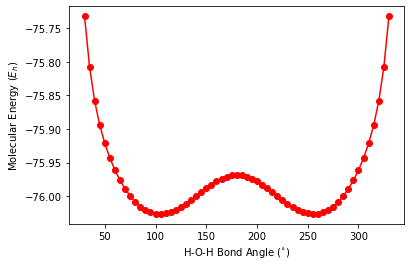

In [25]:
# Visualize energy profile
x = list(scan.keys())
y = list(scan.values())
plt.plot(x,y,'ro-')
plt.xlabel('H-O-H Bond Angle ($^{\circ}$)')
plt.ylabel('Molecular Energy ($E_h$)')
plt.show()

In [22]:
# ==> Compute H atom energy with Hartree-Fock using Psi4 <==

# the H atom has a charge of 0, spin multiplicity of 2 (m_s=1/2)
# and we place it at the xyz origin (0,0,0)

h_atom = psi4.geometry("""
0 2
H 0 0 0
""")

# specify the basis
basis = 'd-aug-cc-pv5z'

# set computation options
psi4.set_options({'basis': basis,
                  'reference': 'rohf',
                  'scf_type': 'pk'})

# compute energy
e = psi4.energy('scf')
psi4.core.clean()

print(f"The Hartree-Fock ground state energy of the H atom in SI units is: {e * psi4.constants.hartree2J} J")
print(f"The Hartree-Fock ground state energy of the H atom in atomic units is: {e} Eh")

The Hartree-Fock ground state energy of the H atom in SI units is: -2.179849658362048e-18 J
The Hartree-Fock ground state energy of the H atom in atomic units is: -0.49999480092533594 Eh


In [50]:
# ==> Set Basic Psi4 Options <==
# Memory specification
psi4.set_memory('500 MB')
numpy_memory = 2 # No NumPy array can exceed 2 MB in size

# set output file
psi4.core.set_output_file('outputh2o.dat', False)

# specify the basis
basis = 'cc-pvdz'
#basis = 'sto-3g'


# Set computation options
psi4.set_options({'basis': basis,
                  'scf_type': 'pk',
                  'e_convergence': 1e-8})


# ==> Define Molecule <==
# Define our model of water -- 
# we will distort the molecule later, which may require C1 symmetry
mol = psi4.geometry("""
O
H 1 1.1
H 1 1.1 2 104
symmetry c1
""")

# compute energy

SCF_E_psi = psi4.energy('scf')
psi4.core.clean()

print(f"The Hartree-Fock ground state energy of the water is: {SCF_E_psi} Eh")

The Hartree-Fock ground state energy of the water is: -75.98979578705956 Eh


In [64]:
psi4.set_memory('500 MB')
psi4.core.set_output_file('outputh2o.dat', False)
basis = 'cc-pvdz'
mol = psi4.geometry("""
0 1
o
h 1 0.958
h 1 0.958 2 104.4776 
""")

psi4.set_options({'basis': basis,
                'guess': 'sad', 'freeze_core': 'true',  'scf_type': 'cd',  'mp2_type': 'cd'})
emp=psi4.energy('omp2', molecule=mol)
print(f"The omp2 ground state energy of the water is: {emp} Eh")

The omp2 ground state energy of the water is: -76.22932292357125 Eh


In [25]:
# ==> Compute static 1e- and 2e- quantities with Psi4 <==
wfn = psi4.core.Wavefunction.build(mol, psi4.core.get_global_option('basis'))

# number of spin alpha orbitals (doubly occupied for closed-shell systems)
ndocc = wfn.nalpha()
nbf = wfn.basisset().nbf()

print(F'Number of occupied orbitals: {ndocc}')
print(F'Number of basis functions: {nbf}') 

Number of occupied orbitals: 5
Number of basis functions: 7


In [26]:
# Construct a molecular integrals object
mints = psi4.core.MintsHelper(wfn.basisset())

# Overlap matrix as a psi4 Matrix object
S_matrix = mints.ao_overlap()

# Overlap matrix converted into an ndarray
S = np.asarray(S_matrix) 

print(F'Shape of S is {S.shape}')

Shape of S is (7, 7)


In [27]:
print(S) #the full matrix may be somewhat hard to read based on the basis set

[[ 1.00000000e+00  2.36703937e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  3.84055925e-02  3.84055925e-02]
 [ 2.36703937e-01  1.00000000e+00 -9.64852854e-18  0.00000000e+00
   0.00000000e+00  3.86138794e-01  3.86138794e-01]
 [ 0.00000000e+00 -9.64852854e-18  1.00000000e+00  0.00000000e+00
   0.00000000e+00  2.09726923e-01  2.09726923e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00 -2.68438220e-01  2.68438220e-01]
 [ 3.84055925e-02  3.86138794e-01  2.09726923e-01  0.00000000e+00
  -2.68438220e-01  1.00000000e+00  1.81759851e-01]
 [ 3.84055925e-02  3.86138794e-01  2.09726923e-01  0.00000000e+00
   2.68438220e-01  1.81759851e-01  1.00000000e+00]]


In [28]:
# Look at the first few elements
def peak(S,nrows=4,ncols=4):
    print(F'Here is a peak at the first {nrows} x {ncols} elements of the matrix:\n{S[:nrows,:ncols]}')
    
peak(S)

Here is a peak at the first 4 x 4 elements of the matrix:
[[ 1.00000000e+00  2.36703937e-01  0.00000000e+00  0.00000000e+00]
 [ 2.36703937e-01  1.00000000e+00 -9.64852854e-18  0.00000000e+00]
 [ 0.00000000e+00 -9.64852854e-18  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [29]:
# example of testing for orthonormality

# define a function
def isBasisOrthonormal(S):
    # get the number of rows of S
    size_S = S.shape[0] 
    
    # construct an identity matrix, I -- "eye", get it?!? Ha ha! Math is so funny!
    identity_matrix = np.eye(size_S) 

    # are all elements of S numerically close to the identity matrix? 
    # We won't test for equality because there can be very small numerical 
    # differences that we don't care about
    orthonormal_check = np.allclose(S, identity_matrix)

    print(F'Q:(T/F) The AO basis is orthonormal? A: {orthonormal_check}')
    return orthonormal_check

# use the function
isBasisOrthonormal(S)

Q:(T/F) The AO basis is orthonormal? A: False


False

In [6]:
import fortecubeview

# shows the color schemes currently available
print(f'Available color schemes: {fortecubeview.colorschemes}')

Available color schemes: ['emory', 'national', 'bright', 'electron', 'wow']


In [7]:
xyz = """
O                     0.000000000000     0.000000000000    -0.065775570547
H                     0.000000000000    -0.759061990794     0.521953018286
H                     0.000000000000     0.759061990794     0.521953018286
"""

fortecubeview.geom(xyz = xyz)

Renderer(camera=OrthographicCamera(bottom=-5.0, children=(DirectionalLight(color='white', intensity=0.5, posit…

In [8]:
import psi4

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")
fortecubeview.geom(molecule = h2o)

Renderer(camera=OrthographicCamera(bottom=-5.0, children=(DirectionalLight(color='white', intensity=0.5, posit…

In [10]:
import fortecubeview

# shows the color schemes currently available
print(f'Available color schemes: {fortecubeview.colorschemes}')

Available color schemes: ['emory', 'national', 'bright', 'electron', 'wow']


In [11]:
fortecubeview.plot(width=500,height=300,colorscheme='emory',sumlevel=0.75)

CubeViewer: listing cube files from the directory .
load_cubes: no cube files found in directory .
CubeViewer: no cube files provided. The widget will not be displayed
